In [136]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [137]:
# Importing data

phone_train = pd.read_csv('C:\\Users\\PC\\Documents\\Datasets\\Mobile phone classification\\train.csv')
phone_test = pd.read_csv('C:\\Users\\PC\\Documents\\Datasets\\Mobile phone classification\\test.csv')                       

In [142]:
# Viewing all columns

pd.set_option('display.max_column', 21)

In [143]:
# Examining data

phone_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [144]:
phone_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [153]:
# Dropping necessary columns

phone_test.drop(columns = ['id'], inplace = True)

In [145]:
phone_train.shape

(2000, 21)

In [213]:
# Getting data info

phone_train.info

<bound method DataFrame.info of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_widt

In [209]:
# Checking for missing values
phone_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [148]:
# Basic statistical analysis of train data

phone_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [210]:
phone_test.info

<bound method DataFrame.info of      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h

In [211]:
phone_test.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [212]:
phone_test.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [172]:
# Count of traget values 

phone_train.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

#### Checking for some column spread for normalization

<Axes: >

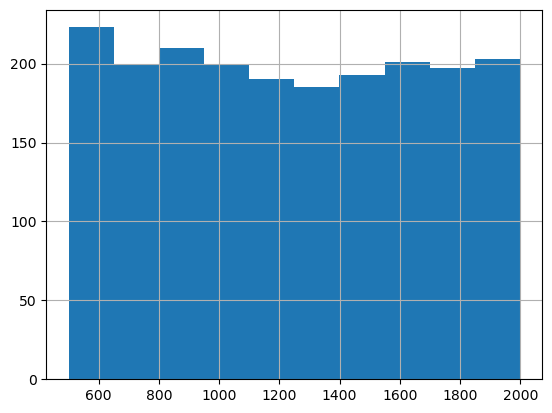

In [164]:
phone_train.battery_power.hist()

<Axes: >

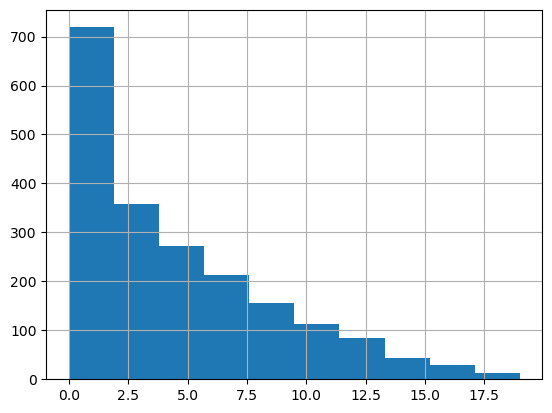

In [166]:
phone_train.fc.hist()

<Axes: >

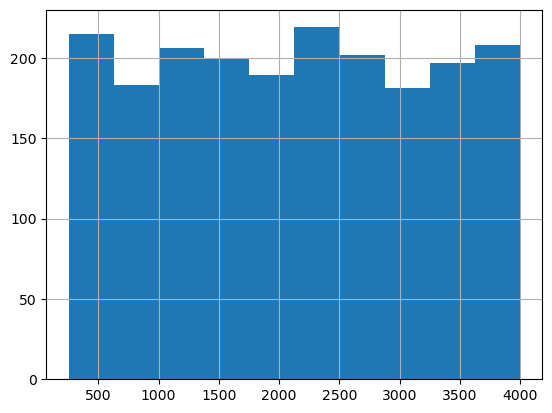

In [167]:
phone_train.ram.hist()

<Axes: >

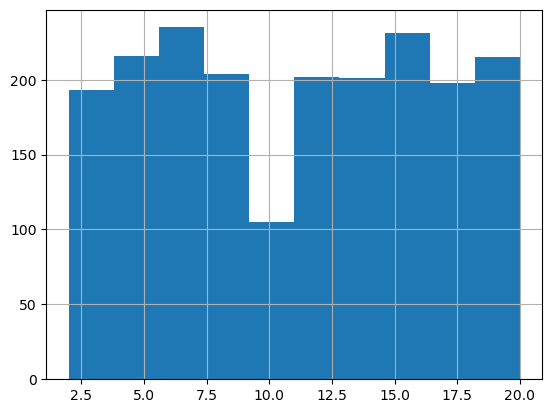

In [168]:
phone_train.talk_time.hist()

<Axes: >

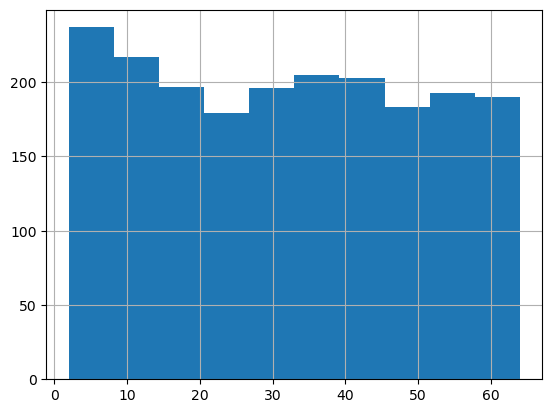

In [169]:
phone_train.int_memory.hist()

In [149]:
cols = phone_train.columns

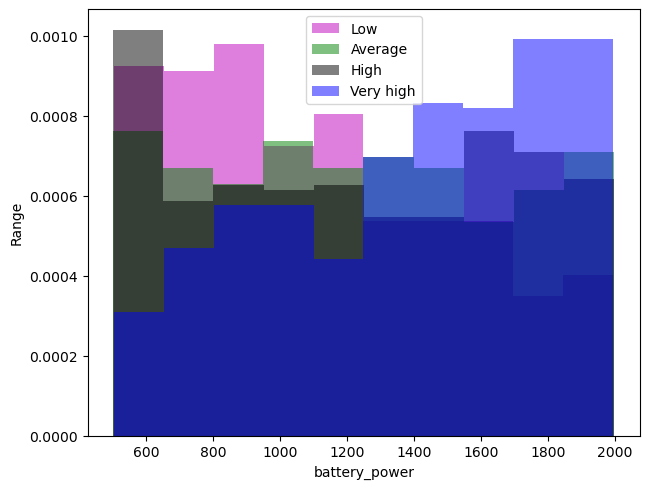

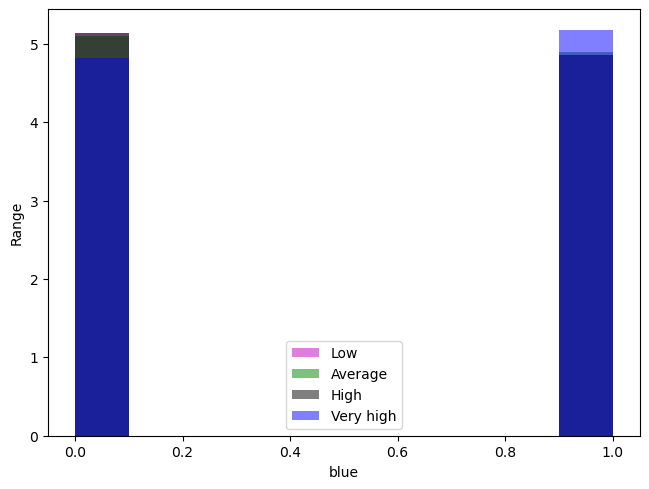

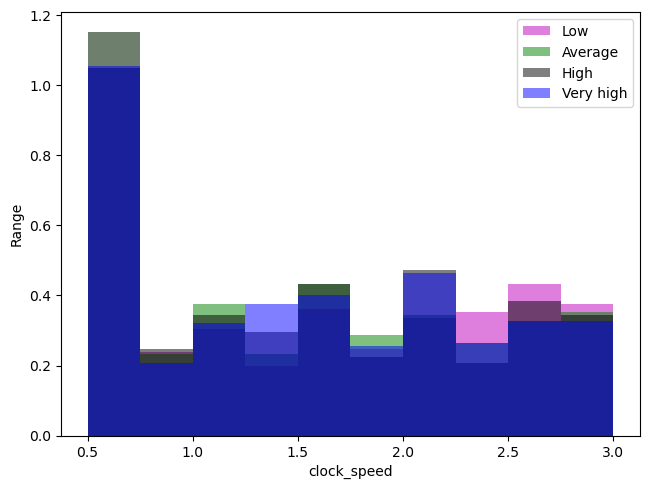

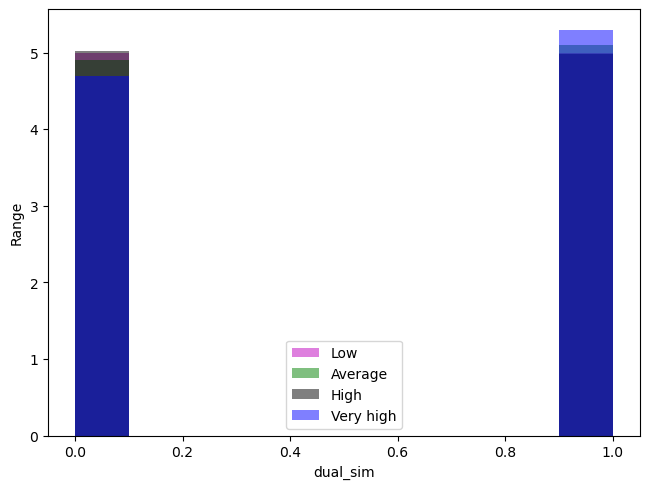

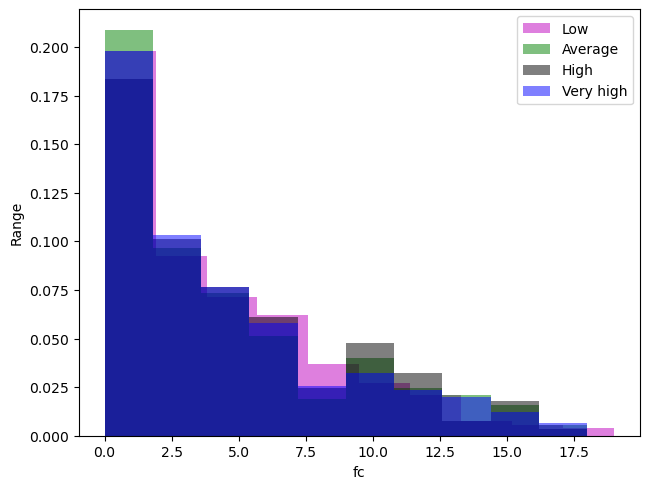

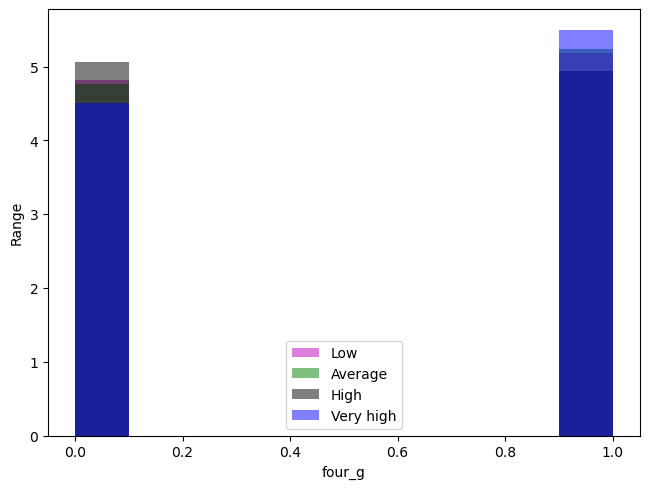

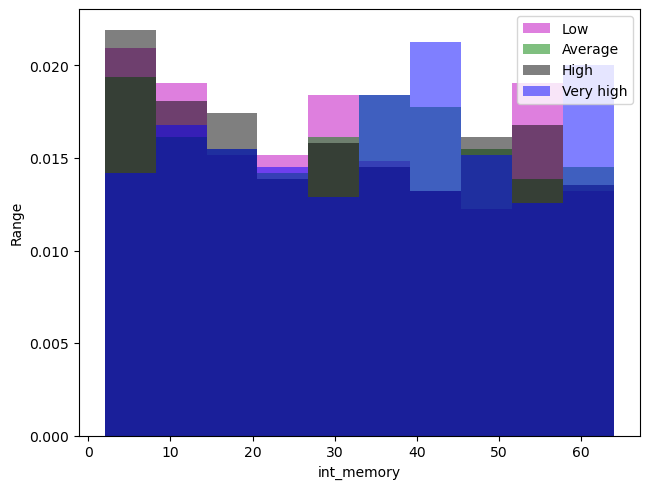

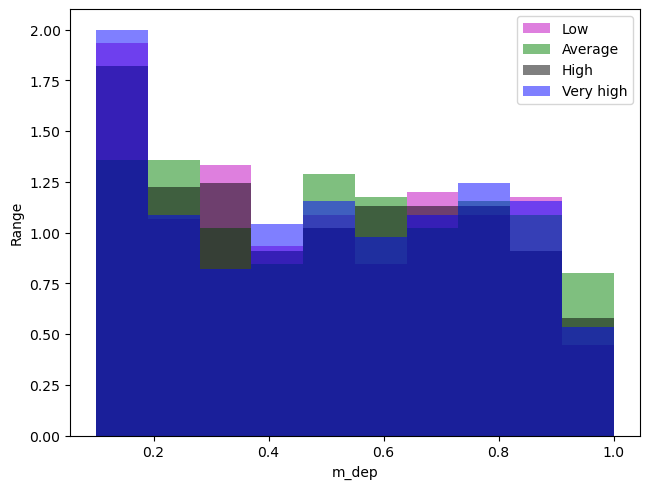

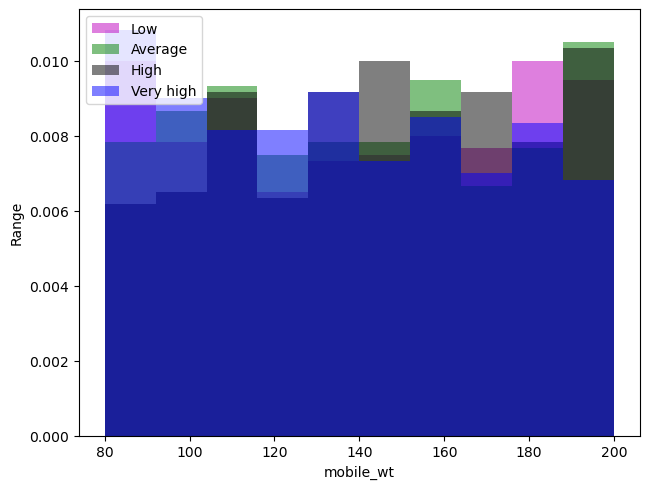

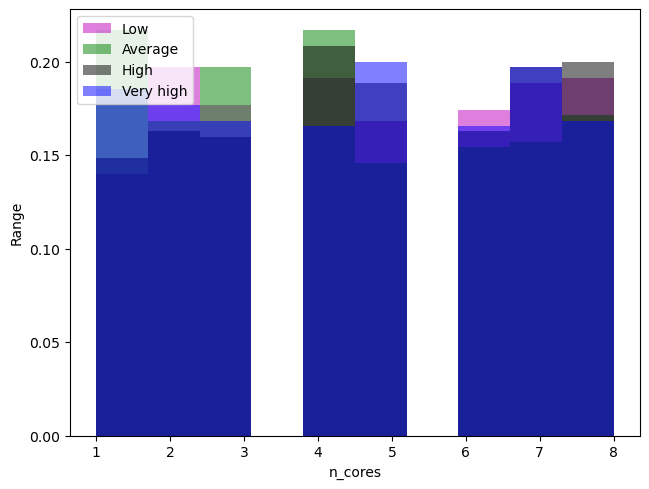

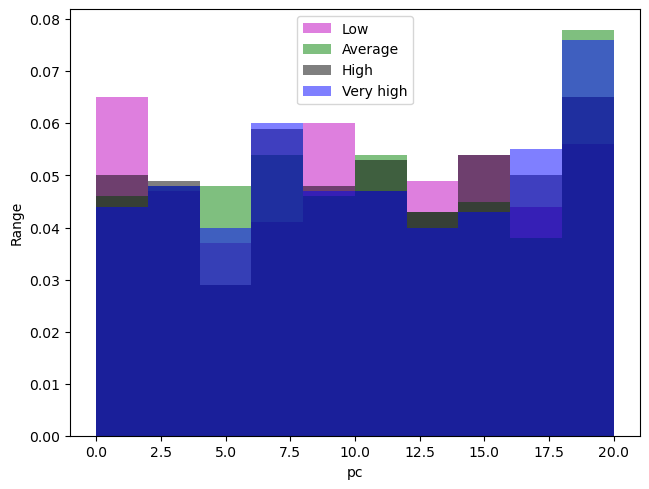

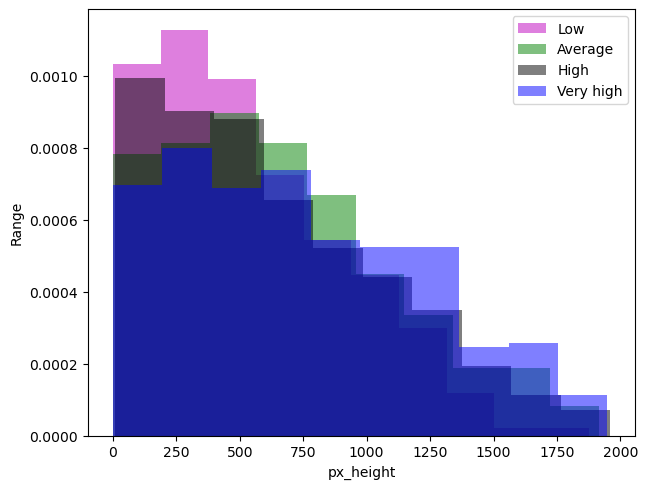

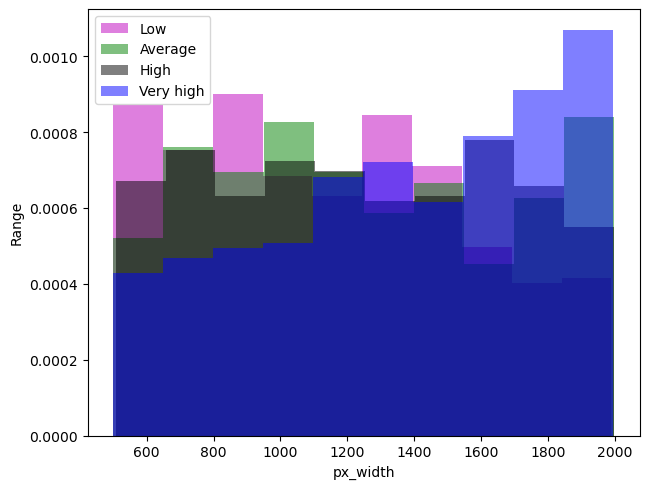

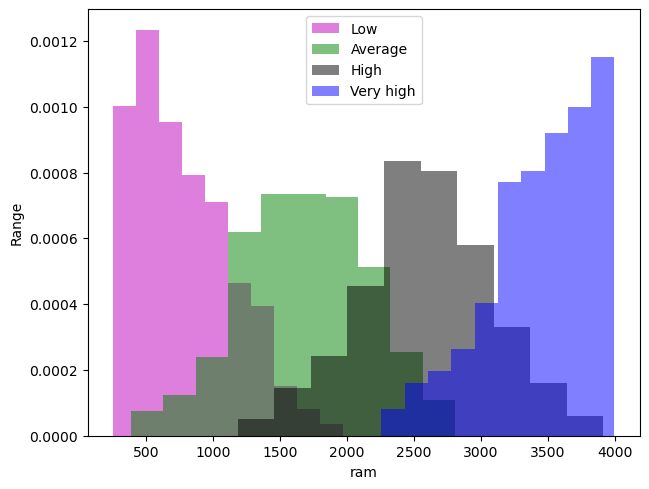

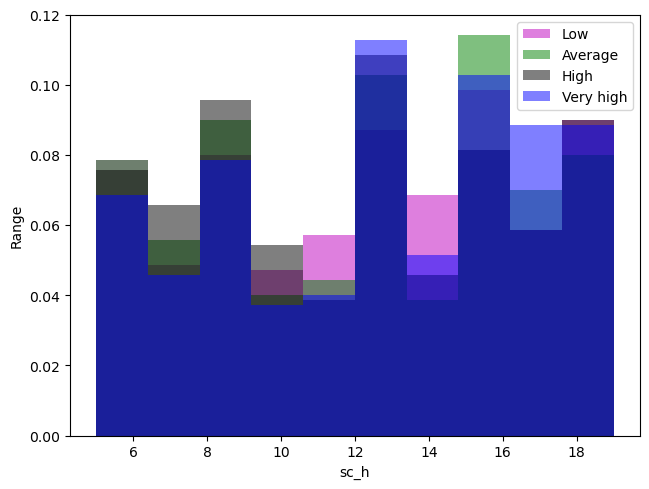

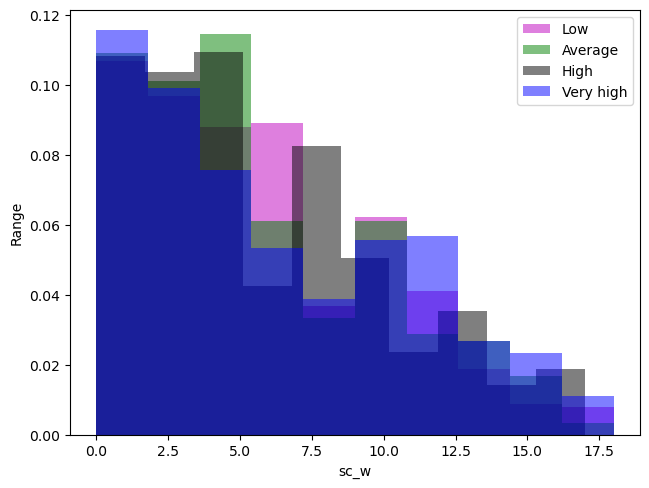

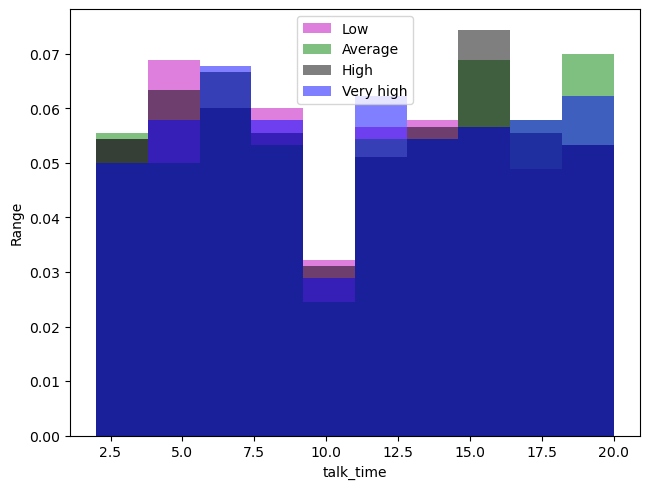

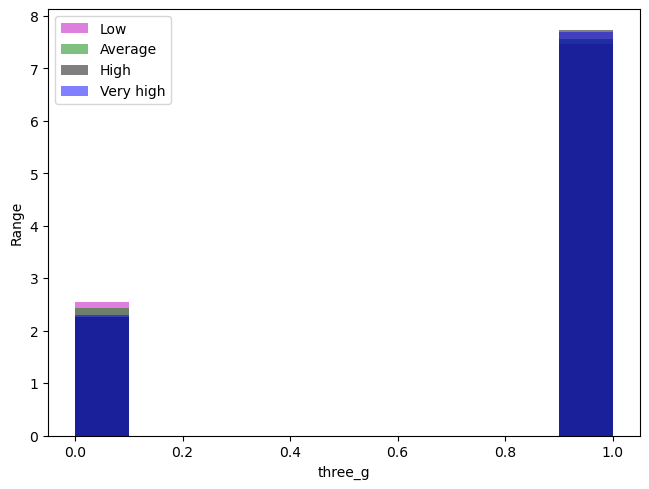

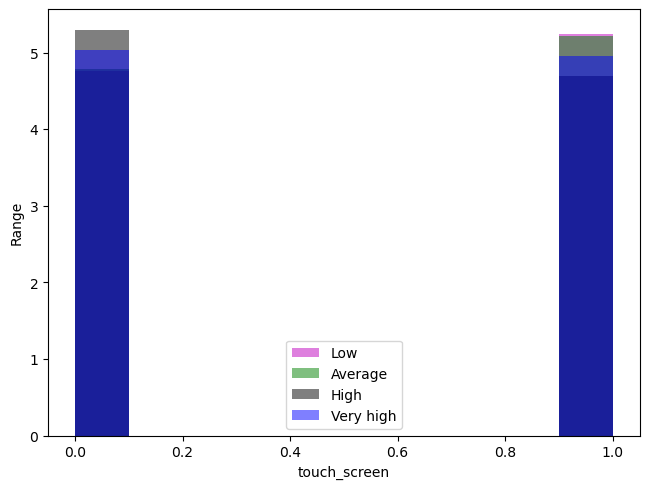

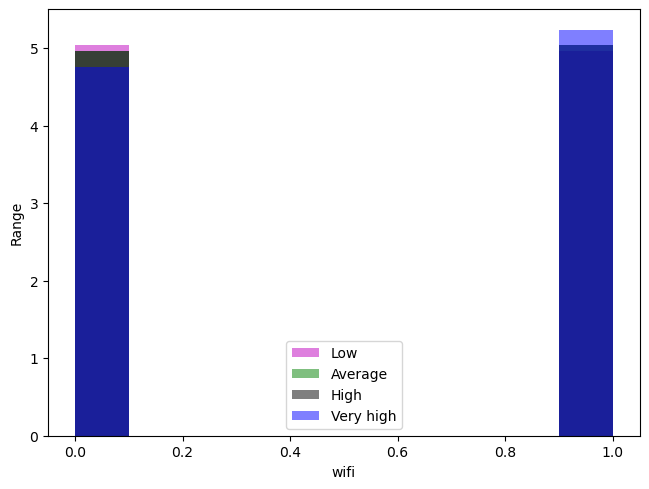

In [216]:
# Plot to visualize relationship between features and each target 

for label in cols[:-1]:
    plt.hist(phone_train[phone_train['price_range'] == 0][label], color = 'm', label = 'Low',alpha = 0.5, density = True)
    plt.hist(phone_train[phone_train['price_range'] == 1][label], color = 'g', label = 'Average',alpha = 0.5, density = True)
    plt.hist(phone_train[phone_train['price_range'] == 2][label], color = 'k', label = 'High',alpha = 0.5, density = True)
    plt.hist(phone_train[phone_train['price_range'] == 3][label], color = 'b', label = 'Very high',alpha = 0.5, density = True)
    plt.tight_layout()
    plt.legend()
    plt.ylabel('Range')
    plt.xlabel(label)
    plt.show()

In [156]:
# Checking for correlation

phone_cor = phone_train.corr()
phone_cor

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


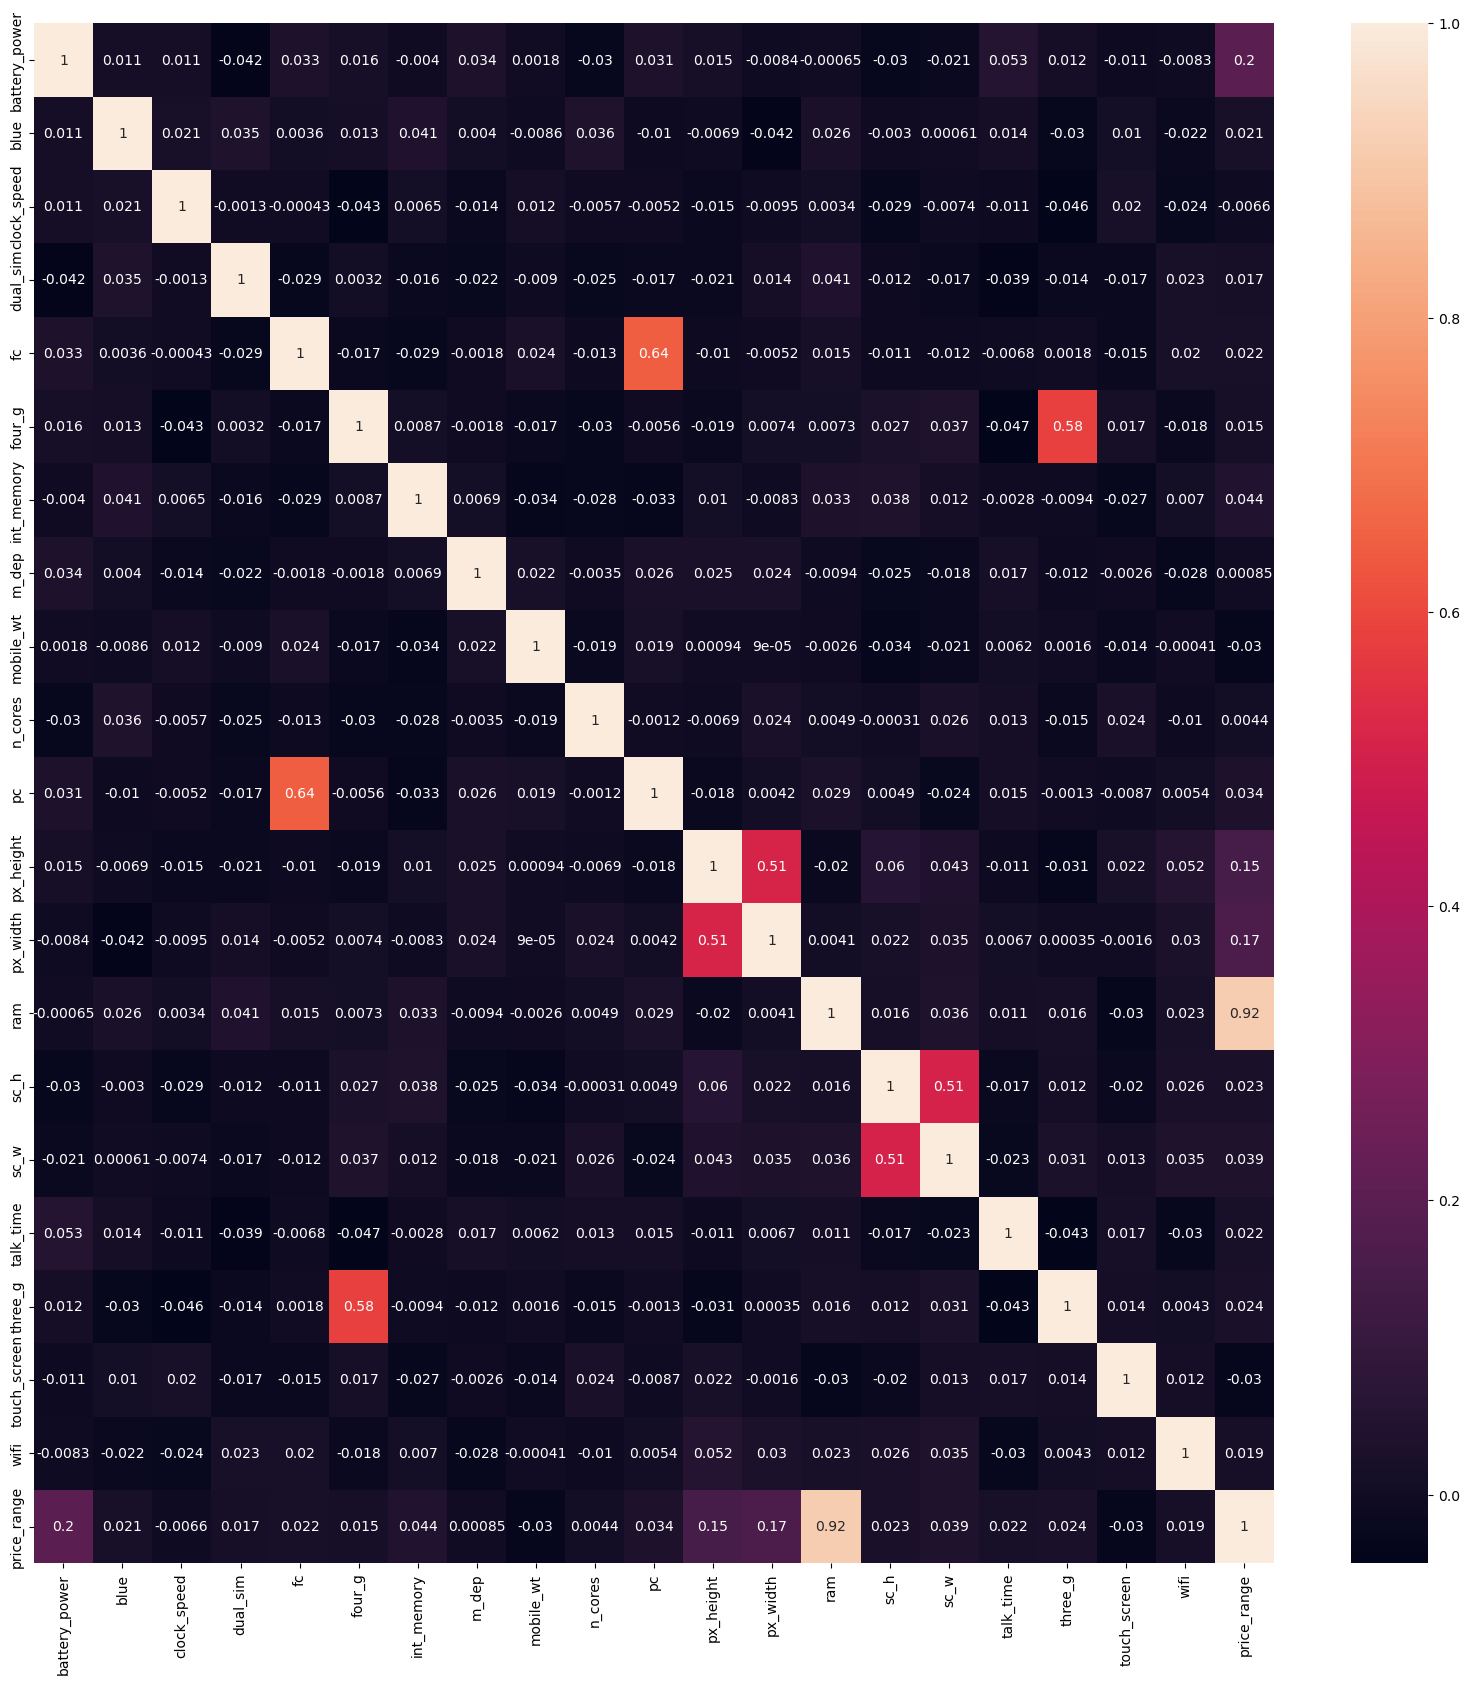

In [171]:
# Visualizing correlations

plt.figure(figsize = (20,20))
sns.heatmap(phone_cor,annot = True)
plt.show()

In [178]:
#Absolute correlation values
cor_target = abs(phone_cor['price_range'])   

# Picking top related features
relevant_features = cor_target[cor_target>=0.01] 

#Getting correlated features
Corr_features = [index for index, value in relevant_features.iteritems()]

#Removing target 
Corr_features.remove('price_range')
print(Corr_features)
len(Corr_features)

['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


C:\Users\PC\AppData\Local\Temp\ipykernel_14804\1390580608.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  Corr_features = [index for index, value in relevant_features.iteritems()]


17

In [189]:
# Creating new data on most relevant features

New_train = phone_train[['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 
                         'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']].copy()

In [181]:
New_test = phone_test[['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width',
                       'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']].copy()

In [190]:
# Splitting data for training set and validation set

train, valid = np.split(New_train.sample(frac = 1), [int(0.75 * len(New_train))])

In [191]:
train

,battery_power,blue,dual_sim,fc,four_g,...,talk_time,three_g,touch_screen,wifi,price_range
1820,665,1,0,0,1,...,15,1,0,0,0
1073,1189,1,0,13,0,...,13,1,1,0,0
1025,1081,1,1,13,0,...,6,0,0,1,0
1759,1020,1,1,3,1,...,9,1,0,1,3
1570,1546,1,1,2,1,...,16,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
625,501,0,0,12,1,...,2,1,0,1,1
799,1567,0,1,3,0,...,10,1,0,0,3
269,1281,1,1,0,0,...,6,0,1,0,1
771,550,1,0,16,1,...,8,1,0,0,0


In [187]:
train.shape

(1500, 17)

In [199]:
# Getting features and target for training set

X_train = train.loc[:, train.columns != 'price_range']
y_train = train['price_range']

In [219]:
X_train.head(10)

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1820,665,1,0,0,1,31,185,2,496,1804,690,5,2,15,1,0,0
1073,1189,1,0,13,0,8,198,14,379,932,893,9,6,13,1,1,0
1025,1081,1,1,13,0,49,99,17,284,519,325,9,1,6,0,0,1
1759,1020,1,1,3,1,27,128,4,919,1482,3204,18,1,9,1,0,1
1570,1546,1,1,2,1,27,124,6,1138,1491,267,12,10,16,1,1,0
365,763,0,1,8,1,2,92,14,1028,1186,1050,6,4,8,1,1,0
1713,1083,1,1,2,1,49,156,9,295,503,1338,16,8,5,1,1,1
1650,1948,0,1,4,0,5,136,13,651,700,361,6,1,10,0,1,0
1680,1826,1,1,5,1,49,172,6,973,1633,1612,17,9,17,1,1,0
1602,1494,0,1,4,1,24,101,17,979,1190,3614,15,12,9,1,0,0


In [217]:
y_train.shape

(1500,)

In [220]:
y_train.head(10)

1820    0
1073    0
1025    0
1759    3
1570    0
365     0
1713    0
1650    0
1680    2
1602    3
Name: price_range, dtype: int64

In [184]:
valid.shape

(500, 17)

In [221]:
valid.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,0,7,1,40,99,11,0,1987,3692,13,0,16,1,1,0,3
576,587,1,1,4,0,6,170,16,612,1793,2777,9,2,14,1,1,0,2
1515,595,0,0,0,1,20,122,18,623,816,1593,19,11,2,1,0,1,0
145,1814,0,1,1,1,9,141,2,756,786,3556,18,12,16,1,0,0,3
412,1478,1,1,12,0,48,99,17,694,882,1141,5,2,6,0,0,1,1


In [201]:
# Getting features and target 

X_valid = valid.loc[:, valid.columns != 'price_range']
y_valid = valid['price_range']

In [202]:
y_valid

1481    3
576     2
1515    0
145     3
412     1
       ..
544     1
1384    1
157     0
1377    3
1637    1
Name: price_range, Length: 500, dtype: int64

In [203]:
#Adding interaction term

def add_interactions(Xd):
    features = Xd.columns
    k = len(features)
    X_inter = Xd.copy(deep = True)
    
    for i in range(k):
        feature_i_name = features[i]
        feature_i_data = Xd[feature_i_name]
        
        for j in range(i+1, k):
            feature_j_name = features[j]
            feature_j_data = Xd[feature_j_name]
            feature_i_j_name = feature_i_name + '_x_' + feature_j_name
            X_inter[feature_i_j_name] = feature_i_data * feature_j_data
            
    return X_inter

In [208]:
X_train_mod = add_interactions(X_train)
X_valid_mod = add_interactions(X_valid)
X_test_mod = add_interactions(New_test)

C:\Users\PC\AppData\Local\Temp\ipykernel_14804\3100859825.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_inter[feature_i_j_name] = feature_i_data * feature_j_data
C:\Users\PC\AppData\Local\Temp\ipykernel_14804\3100859825.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_inter[feature_i_j_name] = feature_i_data * feature_j_data
C:\Users\PC\AppData\Local\Temp\ipykernel_14804\3100859825.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

In [206]:
X_test_mod

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,...,sc_w_x_talk_time,sc_w_x_three_g,sc_w_x_touch_screen,sc_w_x_wifi,talk_time_x_three_g,talk_time_x_touch_screen,talk_time_x_wifi,three_g_x_touch_screen,three_g_x_wifi,touch_screen_x_wifi
0,1043,1,1,14,0,5,193,16,226,1412,...,14,0,7,0,0,2,0,0,0,0
1,841,1,1,4,1,61,191,12,746,857,...,0,0,0,0,7,0,0,0,0,0
2,1807,1,0,1,0,27,186,4,1270,1366,...,100,0,10,10,0,10,10,0,0,1
3,1546,0,1,18,1,25,96,20,295,1752,...,0,0,0,0,7,7,0,1,0,0
4,1434,0,0,11,1,49,108,18,749,810,...,56,8,0,8,7,0,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,0,0,1,54,170,17,644,913,...,120,8,8,0,15,15,0,1,0,0
996,609,0,1,0,0,13,186,2,1152,1632,...,19,0,1,1,0,19,19,0,0,1
997,1185,0,0,1,1,8,80,12,477,825,...,0,0,0,0,14,0,0,0,0,0
998,1533,1,1,0,0,50,171,12,38,832,...,66,0,11,0,0,6,0,0,0,0


In [226]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

### EXPERIMENTATION

#### Model 1

In [227]:
# Instantiating model

xgb = XGBClassifier(learning_rate = 0.1, colsample_bytree = 1.0, max_depth = 4, subsample = 1.0, n_estimators = 200)

In [229]:
# Evaluation set
Eval_set = [(X_valid_mod, y_valid)]

#Fitting model
xgb.fit(X_train_mod, y_train,early_stopping_rounds = 10, eval_metric = 'mlogloss', eval_set = Eval_set, verbose = False)

C:\Users\PC\anaconda3\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\PC\anaconda3\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [230]:
#Predicting on validation set
xgb_pred = xgb.predict(X_valid_mod)
xgb_pred

array([3, 2, 0, 3, 1, 0, 3, 3, 1, 0, 2, 1, 0, 3, 2, 3, 1, 0, 3, 3, 2, 2,
       2, 3, 0, 3, 0, 2, 1, 2, 1, 0, 1, 3, 1, 3, 3, 3, 1, 2, 0, 2, 0, 3,
       1, 3, 3, 0, 0, 2, 2, 2, 3, 1, 2, 2, 3, 1, 0, 3, 3, 2, 0, 1, 2, 3,
       0, 1, 2, 1, 2, 3, 3, 0, 3, 0, 3, 1, 0, 0, 2, 2, 0, 3, 3, 2, 1, 0,
       0, 0, 1, 0, 2, 2, 3, 1, 2, 3, 0, 3, 3, 0, 1, 2, 2, 1, 2, 3, 3, 2,
       1, 3, 1, 2, 3, 0, 0, 3, 0, 2, 1, 3, 1, 0, 2, 0, 1, 0, 3, 1, 2, 2,
       2, 1, 2, 3, 1, 2, 0, 3, 0, 0, 2, 1, 1, 0, 2, 0, 2, 3, 0, 1, 0, 2,
       2, 0, 2, 2, 0, 3, 1, 2, 1, 0, 1, 2, 3, 0, 0, 0, 1, 3, 3, 1, 3, 0,
       1, 0, 1, 3, 2, 0, 0, 1, 2, 2, 2, 3, 1, 2, 1, 3, 1, 3, 2, 2, 3, 2,
       2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 1, 2, 0, 1, 0, 2, 0, 0, 3, 2, 3, 2,
       2, 2, 3, 2, 3, 3, 2, 2, 0, 0, 0, 2, 2, 3, 0, 2, 1, 2, 0, 1, 1, 2,
       2, 1, 0, 0, 1, 3, 1, 2, 1, 1, 0, 0, 2, 0, 2, 2, 3, 0, 2, 2, 0, 0,
       2, 1, 1, 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 3, 2,
       2, 1, 3, 1, 3, 3, 1, 0, 1, 2, 0, 2, 0, 2, 3,

In [231]:
train_score_I = xgb.score(X_train_mod,y_train)
train_score_I

1.0

In [232]:
validation_score_I = xgb.score(X_valid_mod, y_valid)
validation_score_I

0.924

In [233]:
xgb_cm = confusion_matrix(y_valid, xgb_pred)
xgb_cm

array([[130,   6,   0,   0],
       [  3, 110,   7,   0],
       [  0,   7, 116,   8],
       [  0,   0,   7, 106]], dtype=int64)

<Axes: title={'center': 'XGBOOST CONFUSION MATRIX'}>

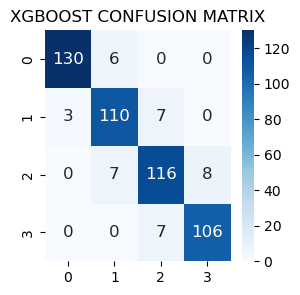

In [234]:
# Visualizing confusion matrix

plt.figure(figsize = (3,3))
plt.title('XGBOOST CONFUSION MATRIX')
sns.heatmap(xgb_cm, annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12})

In [235]:
print(classification_report(y_valid, xgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       136
           1       0.89      0.92      0.91       120
           2       0.89      0.89      0.89       131
           3       0.93      0.94      0.93       113

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



#### Model 2

In [263]:
# Instantiating model

xgb_II = XGBClassifier(learning_rate = 0.05, colsample_bytree = 0.855, max_depth = 4, subsample = 0.75, 
                       n_estimators = 250, eta = 0.05)

In [264]:
# Evaluation set
Eval_set = [(X_valid_mod, y_valid)]

#Fitting model
xgb_II.fit(X_train_mod, y_train,early_stopping_rounds = 10, eval_metric = 'mlogloss', eval_set = Eval_set, verbose = False)

C:\Users\PC\anaconda3\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\PC\anaconda3\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.855, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [265]:
#Predicting on validation set

xgb_pred_II = xgb_II.predict(X_valid_mod)
xgb_pred_II

array([3, 2, 0, 3, 1, 0, 3, 3, 1, 0, 2, 1, 0, 3, 2, 3, 1, 0, 3, 3, 2, 2,
       3, 3, 0, 3, 0, 2, 1, 2, 1, 0, 1, 3, 1, 3, 3, 3, 1, 2, 0, 2, 0, 3,
       1, 3, 3, 0, 0, 3, 2, 2, 3, 1, 2, 2, 3, 1, 0, 3, 3, 2, 0, 1, 2, 3,
       0, 1, 3, 1, 2, 3, 3, 0, 3, 0, 3, 1, 0, 0, 2, 2, 0, 3, 3, 2, 1, 0,
       0, 0, 1, 0, 2, 2, 3, 1, 2, 3, 0, 3, 3, 0, 1, 2, 2, 1, 2, 3, 3, 2,
       1, 3, 1, 2, 3, 0, 0, 3, 0, 2, 1, 3, 1, 0, 2, 0, 1, 0, 3, 1, 2, 2,
       2, 1, 2, 3, 1, 2, 0, 3, 0, 0, 2, 1, 1, 0, 2, 0, 2, 3, 0, 1, 0, 2,
       2, 0, 2, 2, 0, 3, 1, 1, 1, 0, 1, 2, 3, 0, 0, 0, 1, 3, 3, 1, 2, 0,
       0, 0, 1, 3, 2, 0, 0, 1, 2, 2, 2, 3, 1, 2, 0, 3, 1, 3, 2, 2, 3, 2,
       2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 1, 2, 0, 1, 0, 2, 0, 0, 3, 2, 3, 2,
       2, 2, 3, 2, 3, 3, 2, 2, 0, 0, 0, 2, 2, 3, 0, 2, 1, 2, 0, 1, 1, 2,
       2, 1, 0, 0, 1, 3, 0, 2, 1, 1, 0, 0, 2, 0, 2, 3, 3, 0, 2, 2, 0, 0,
       2, 1, 1, 1, 3, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 3, 2,
       2, 1, 3, 1, 3, 3, 1, 0, 1, 2, 0, 2, 0, 2, 3,

In [266]:
train_score_II = xgb_II.score(X_train_mod, y_train)
train_score_II

1.0

In [267]:
validation_score_II = xgb_II.score(X_valid_mod, y_valid)
validation_score_II

0.932

In [268]:
xgb_cm_II = confusion_matrix(y_valid, xgb_pred_II)
xgb_cm_II

array([[134,   2,   0,   0],
       [  2, 112,   6,   0],
       [  0,   7, 114,  10],
       [  0,   0,   7, 106]], dtype=int64)

<Axes: title={'center': 'XGBOOST CONFUSION MATRIX'}>

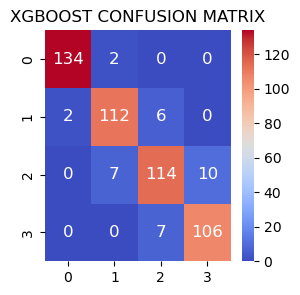

In [271]:
plt.figure(figsize = (3,3))
plt.title('XGBOOST CONFUSION MATRIX')
sns.heatmap(xgb_cm_II, annot=True,cmap="coolwarm",fmt="d",cbar=True, annot_kws={"size": 12})

In [272]:
print(classification_report(y_valid, xgb_pred_II))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       136
           1       0.93      0.93      0.93       120
           2       0.90      0.87      0.88       131
           3       0.91      0.94      0.93       113

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



#### Model 3

In [252]:
# Instantianting model

xgb_III = XGBClassifier(learning_rate = 0.01, colsample_bytree = 0.5, max_depth = 4, subsample = 1.0, n_estimators=200)

In [253]:
# Creating evaluation set
Eval_set = [(X_valid_mod, y_valid)]

# Fitting model
xgb_III.fit(X_train_mod, y_train, early_stopping_rounds = 15, eval_metric = 'mlogloss', eval_set = Eval_set, verbose = False)

C:\Users\PC\anaconda3\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\PC\anaconda3\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [254]:
xgb_pred_III = xgb_III.predict(X_valid_mod)
xgb_pred_III

array([3, 2, 1, 3, 0, 0, 3, 3, 1, 1, 3, 1, 0, 3, 2, 3, 1, 0, 3, 3, 2, 2,
       3, 3, 0, 3, 0, 2, 0, 2, 1, 0, 1, 3, 1, 3, 3, 3, 1, 2, 0, 2, 0, 3,
       1, 3, 3, 0, 0, 3, 2, 2, 3, 1, 2, 2, 3, 1, 0, 3, 3, 2, 0, 1, 2, 3,
       0, 2, 2, 1, 2, 3, 3, 0, 3, 0, 3, 1, 0, 0, 2, 2, 0, 3, 3, 2, 1, 0,
       0, 0, 1, 0, 2, 2, 3, 1, 2, 2, 0, 3, 3, 0, 1, 1, 2, 1, 2, 3, 3, 2,
       1, 3, 1, 2, 3, 1, 0, 2, 0, 2, 1, 3, 1, 0, 2, 0, 1, 0, 3, 1, 3, 2,
       2, 2, 2, 3, 1, 2, 0, 3, 0, 0, 2, 1, 1, 0, 2, 0, 2, 3, 0, 1, 0, 2,
       2, 0, 2, 2, 0, 3, 1, 1, 1, 0, 1, 2, 3, 0, 0, 0, 1, 3, 3, 1, 3, 0,
       1, 0, 1, 3, 2, 0, 0, 1, 3, 2, 2, 3, 1, 2, 1, 3, 1, 3, 3, 2, 3, 2,
       2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 1, 2, 0, 1, 0, 2, 0, 0, 3, 2, 3, 2,
       2, 1, 3, 2, 3, 3, 2, 2, 0, 0, 0, 2, 2, 3, 0, 3, 1, 2, 0, 1, 1, 3,
       2, 1, 0, 0, 1, 3, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 3, 0, 2, 2, 0, 0,
       2, 1, 1, 2, 3, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 3, 2,
       2, 1, 3, 1, 3, 3, 1, 0, 1, 1, 0, 2, 0, 2, 3,

In [255]:
train_score_III = xgb_III.score(X_train_mod, y_train)
train_score_III

0.9793333333333333

In [256]:
validation_score_III = xgb.score(X_valid_mod, y_valid)
validation_score_III

0.924

In [257]:
xgb_cm_III = confusion_matrix(y_valid, xgb_pred_III)
xgb_cm_III

array([[129,   7,   0,   0],
       [  3, 109,   8,   0],
       [  0,  12, 104,  15],
       [  0,   0,   9, 104]], dtype=int64)

<Axes: title={'center': 'XGBOOST CONFUSION MATRIX'}>

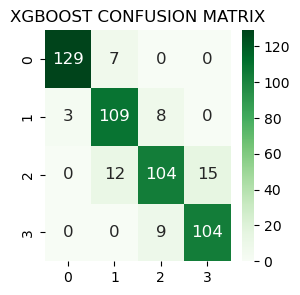

In [259]:
plt.figure(figsize = (3,3))
plt.title('XGBOOST CONFUSION MATRIX')
sns.heatmap(xgb_cm_III, annot=True,cmap="Greens",fmt="d",cbar=True, annot_kws={"size": 12})

In [260]:
print(classification_report(y_valid, xgb_pred_III))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       136
           1       0.85      0.91      0.88       120
           2       0.86      0.79      0.83       131
           3       0.87      0.92      0.90       113

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



### Model comparism

Creating a table to view the accuracies of the various models

In [273]:
Model = [['Model 1', train_score_I, validation_score_I],
         ['Model 2', train_score_II, validation_score_II],
         ['Model 3', train_score_III, validation_score_III]]

In [274]:
Compare = pd.DataFrame(Model, columns = ['Model', 'Training score', 'Validation score'])
Compare

,Model,Training score,Validation score
0,Model 1,1.000000,0.924
1,Model 2,1.000000,0.932
2,Model 3,0.979333,0.924


### DEPLOYMENT

Model 2 performed on evaluation and will be used to ptredict new data

In [275]:
# Making predictions with best performing model on test data

Test_pred = xgb_II.predict(X_test_mod)
Test_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 2, 1, 3, 2, 1, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

In [276]:
# Coverting prediction data to dataframe

Prediction = pd.DataFrame(Test_pred)
Prediction

,0
0,3
1,3
2,2
3,3
4,1
...,...
995,2
996,1
997,0
998,2


In [277]:
# Merging predictions to test data

New_result = pd.concat([phone_test, Prediction], axis = 1, join='inner')
New_result

,battery_power,blue,clock_speed,dual_sim,fc,...,talk_time,three_g,touch_screen,wifi,0
0,1043,1,1.8,1,14,...,2,0,1,0,3
1,841,1,0.5,1,4,...,7,1,0,0,3
2,1807,1,2.8,0,1,...,10,0,1,1,2
3,1546,0,0.5,1,18,...,7,1,1,0,3
4,1434,0,1.4,0,11,...,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,...,15,1,1,0,2
996,609,0,1.8,1,0,...,19,0,1,1,1
997,1185,0,1.4,0,1,...,14,1,0,0,0
998,1533,1,0.5,1,0,...,6,0,1,0,2


In [278]:
# Renaming prediction column
New_result.rename(columns = {0:'New price range'}, inplace = True)

In [279]:
New_result

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,New price range
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,2
